Here's a good paper to look at for some related work: http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000190



In [28]:
import Cluster as C
import RTRL as network
import NetworkIOStreams as nio
import dimensions_kit as dk
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable     
import scipy.cluster.hierarchy as sch
numNets = 6                                  
nNodes = 6                                        
net = network.RTRLNetwork;   

In [29]:
def plot_solutions(weight_solutions):
       
      dims = dk.dimensions(len(weight_solutions))
      print dims
      f, axes = plt.subplots(*dims,figsize=(10,10))
      for s in range(len(weight_solutions)):
           sol = weight_solutions[s]
           x, y= dk.transform(dims, s)
           axis = axes[x][y]
           pc = axis.pcolormesh(sol)

           div = make_axes_locatable(axis)
           cax = div.append_axes("right", size="5%", pad=0.01)
           cbar = plt.colorbar(pc, cax=cax)
                        
      i = len(weight_solutions)
      while i < dims[0]*dims[1]:
           x,y = dk.transform(dims,i )
           axes[x][y].axis('off')
           i+=1
      f.tight_layout()
      return f  

In [30]:
def new_aggregator(p):

    """
    p is a 4-vector containing at its indices:
    0 - number of nodes for the aggregator
    2 - delay for the network input
    3 - eta learning rate
    4 - number of iterations to train the network for
    """
    NODES = 0
    DELAY = 1
    ETA = 2  
    ITER = 3

    nnodes = p[NODES]
    delay = p[DELAY]
    eta = p[ETA]
    niterations = p[ITER]

    network = net(nNodes=nnodes, io = nio.XorIOStream(delay = delay), eta = eta)

    agg = C.RunNetwork(network)
    return agg
                

In [31]:
                     

params = [(6, 2, 0.5,1000)]*numNets                
networks = map(new_aggregator, params)            
results = C.StochasticSolutionGenerator(networks) 

Running network: 0
Solution: [[  0.00000000e+00  -4.82570519e-01   9.34454425e+00   5.23860402e-01
    2.94043376e-01   3.93500424e+00  -1.14486892e-01  -1.36347106e-01
   -6.50194181e+00]
 [  2.75225799e-01   3.34266899e-01   2.03992619e-01  -1.49019495e-02
   -9.68650997e-03  -3.59094952e-01  -5.97692691e+00  -5.96544859e+00
    1.86900159e+00]
 [ -8.55793081e-01  -6.32437882e+00  -2.79846850e+00   5.35325438e+00
   -5.84105035e-01   2.11091987e+00   4.20717161e-01   4.28713786e-01
   -1.98217020e+00]
 [  9.02623545e-04  -1.55105162e+00   4.71778109e-01   1.74061264e+00
   -3.14341345e-01   9.17860454e-01  -3.19678860e+00  -3.20691755e+00
    3.25161160e+00]
 [ -8.78151293e-01  -4.48291413e-01  -4.73788052e-01  -3.50794475e-01
   -4.22801852e-01  -5.07210055e-01  -1.60357105e+00  -1.59534322e+00
   -1.36841439e+00]
 [ -7.16636309e-01  -3.74911391e+00  -8.44386859e-01   2.87369540e+00
   -3.03503202e-01   1.08679812e+00  -7.53477479e-01  -7.40399599e-01
   -3.40853174e-01]]
 took 7.25

Now lets get into plotting

6
(3, 2)


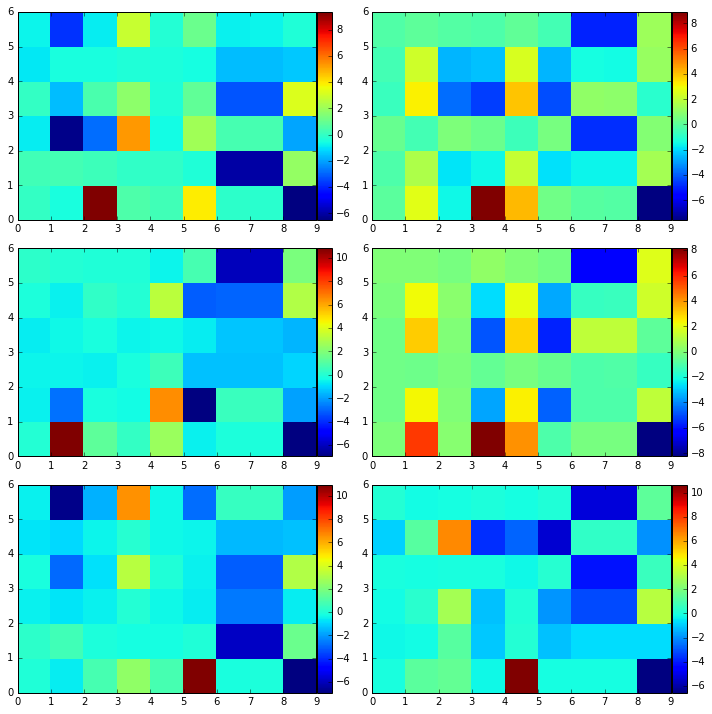

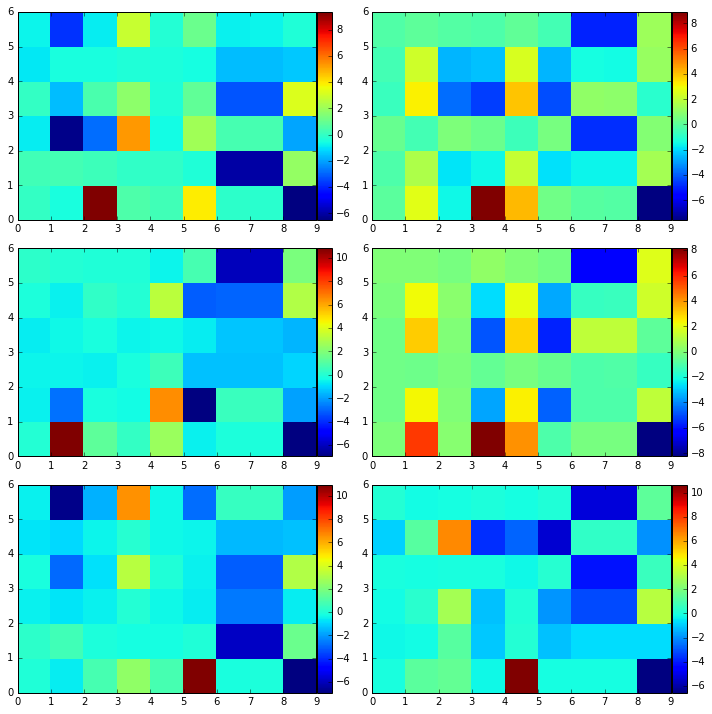

In [34]:
print len(results.solutions[0:10])

plot_solutions(results.solutions)



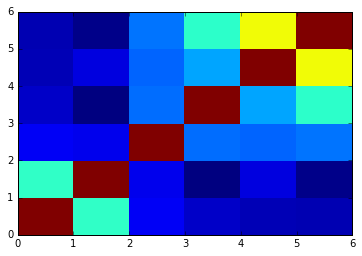

In [35]:
correlations = results.genCorrelationMatrix()

Z = sch.linkage(correlations, method='centroid')
indexs = sch.leaves_list(Z)

clustered_correl = correlations[indexs][:,indexs]
ax = plt.figure().add_subplot(111)
ax.pcolormesh(clustered_correl)  